# CGとディジタルカメラモデル


nbviewerで見るほうが見やすいのでおすすめです. 
下記リンク先にこのページのURLを貼り付けるだけでOK.

https://nbviewer.jupyter.org/

<a href="https://nbviewer.jupyter.org/" target="_blank">
    <img src="nbviewer-page-image.png" width="100%">
</a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#Path" data-toc-modified-id="Path-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Path</a></span></li><li><span><a href="#画像の読み込み(テスト)" data-toc-modified-id="画像の読み込み(テスト)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>画像の読み込み(テスト)</a></span></li></ul></li><li><span><a href="#1-2-ディジタル画像の基礎" data-toc-modified-id="1-2-ディジタル画像の基礎-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1-2 ディジタル画像の基礎</a></span><ul class="toc-item"><li><span><a href="#量子化" data-toc-modified-id="量子化-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>量子化</a></span><ul class="toc-item"><li><span><a href="#8ビット量子化-256階調" data-toc-modified-id="8ビット量子化-256階調-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>8ビット量子化 256階調</a></span></li><li><span><a href="#def-convert_quantization" data-toc-modified-id="def-convert_quantization-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>def convert_quantization</a></span></li><li><span><a href="#6ビット量子化-64階調" data-toc-modified-id="6ビット量子化-64階調-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>6ビット量子化 64階調</a></span></li><li><span><a href="#4ビット量子化-16階調" data-toc-modified-id="4ビット量子化-16階調-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>4ビット量子化 16階調</a></span></li><li><span><a href="#2ビット量子化-4階調" data-toc-modified-id="2ビット量子化-4階調-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>2ビット量子化 4階調</a></span></li><li><span><a href="#1ビット量子化-2階調" data-toc-modified-id="1ビット量子化-2階調-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>1ビット量子化 2階調</a></span></li><li><span><a href="#OpenCVの２値化処理" data-toc-modified-id="OpenCVの２値化処理-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>OpenCVの２値化処理</a></span></li><li><span><a href="#Plot-All" data-toc-modified-id="Plot-All-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Plot All</a></span></li></ul></li></ul></li></ul></div>

## Config

### import

In [1]:
import os
import sys
import pathlib

import numpy
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
print(sys.version)

3.5.2 (default, Nov 12 2018, 13:43:14) 
[GCC 5.4.0 20160609]


### Path

In [3]:
HOME_Path = pathlib.Path(os.getcwd()).parents[1]
img_dir_Path = HOME_Path / "img"
assert HOME_Path.exists()
assert img_dir_Path.exists()
print(HOME_Path)
print(img_dir_Path)

/media/pollenjp/DATA2TB/workdir/git/__book__Computer-Graphics_CG-ARTS
/media/pollenjp/DATA2TB/workdir/git/__book__Computer-Graphics_CG-ARTS/img


### 画像の読み込み(テスト)

cv2.IMREAD_GRAYSCALE       : 0
type(cv2.IMREAD_GRAYSCALE) : <class 'int'>
im.dtype : uint8
im.shape : (256, 256)
---------------------
| Height  | Width   |
|     256 |     256 |
---------------------


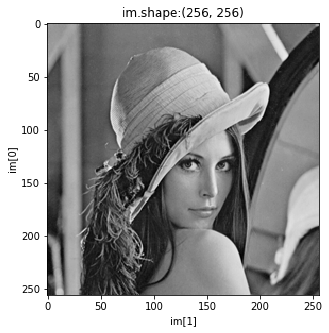

In [4]:
# grayscale image
_filepath = str(img_dir_Path / "mono" / "LENNA.bmp")
im = cv2.imread(filename=_filepath, flags=cv2.IMREAD_GRAYSCALE)
assert im is not None, "Could not open or find the image : {}".format(_filepath)

# cv2.IMREAD_GRAYSCALE はただの整数でありopencvでは整数でflagsを指定することがよくある,ということを頭に入れておくこと
print("cv2.IMREAD_GRAYSCALE       : {}".format(cv2.IMREAD_GRAYSCALE))
print("type(cv2.IMREAD_GRAYSCALE) : {}".format(type(cv2.IMREAD_GRAYSCALE)))

_im = im
print("im.dtype : {}".format(_im.dtype))
_h, _w = _im.shape
print("im.shape : {}".format(_im.shape))
print("---------------------\n" +
      "| Height  | Width   |\n" +
      "| {:7} | {:7} |\n".format(_h, _w) +
      "---------------------")

#======================================
fig = plt.figure(figsize=(5,5))
nrows, ncols, idx = 1, 1, 0
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im, cmap="gray")
ax.set_title(label="im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
#===================
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## 1-2 ディジタル画像の基礎

### 量子化

#### 8ビット量子化 256階調

im.dtype : uint8
im.shape : (256, 256)
---------------------
| Height  | Width   |
|     256 |     256 |
---------------------


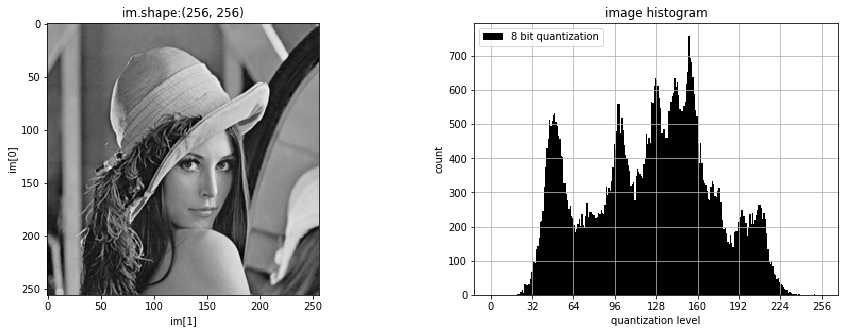

In [5]:
# grayscale image
_filepath = str(img_dir_Path / "mono" / "LENNA.bmp")
im = cv2.imread(filename=_filepath, flags=cv2.IMREAD_GRAYSCALE)
assert im is not None, "Could not open or find the image : {}".format(_filepath)

_im = im
print("im.dtype : {}".format(_im.dtype))
_h, _w = _im.shape
print("im.shape : {}".format(_im.shape))
print("---------------------\n" +
      "| Height  | Width   |\n" +
      "| {:7} | {:7} |\n".format(_h, _w) +
      "---------------------")

_im = im
#======================================
fig = plt.figure(figsize=(15,5))
nrows, ncols, idx = 1, 2, 0
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im, cmap="gray")
ax.set_title(label="im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
#======================================
# image histogram
bins_range = np.arange(0, 2**8+1, 1)
xtics_range = np.arange(0, 2**8+1, 32)
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.hist(x=_im.flatten(), bins=bins_range, color="black", label="8 bit quantization")
ax.set_title(label="image histogram")
ax.set_xlabel(xlabel="quantization level")
ax.set_ylabel(ylabel="count")
ax.legend(loc=2)
ax.grid(b=True)
ax.set_xticks(ticks=xtics_range)
#===================
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

####  def convert_quantization

In [72]:
def convert_quantization(image, to_bit, from_bit=8):
    """
    |-Parameters
    | image_conv | numpy.array |
    | to_bit     | int         | 1,2,...,7
    | from_bit   | int         | default 8, ehis parameter should not change
    |-Returns
    | image_conv | numpy.array
    """
    import math
    default_numpy_uint = np.uint8
    image = image.astype(dtype=default_numpy_uint)

    n_step1 = 2**from_bit
    n_step2 = 2**to_bit

    assert n_step1 % n_step2 == 0
    q_interval = np.float(n_step1) / (n_step2 - 1)

    # quantization steps
    q_steps = []
    for i in range(n_step2-1):
        q_steps.append(int(i*q_interval))  # this cause some Rounding Error
    q_steps.append(int(255))
    assert len(q_steps) == n_step2

    image2 = np.zeros_like(a=image, dtype=default_numpy_uint)
    x = q_interval / 2
    prev_step = q_steps[0] - q_interval
    for step in q_steps:
        c = (math.floor(prev_step+x) <= image) * (image < math.floor(step+x)) 
        image2 += c * default_numpy_uint(step)
        prev_step = step
    return image2

In [49]:
a = np.random.randint(low=0, high=256, size=(5, 5), dtype=np.uint8)
b = convert_quantization(image=a, to_bit=4)
b

17.066666666666666


array([[187, 153, 255,  68,  34],
       [  0, 136, 136, 204, 221],
       [ 68, 102, 170, 238, 119],
       [ 17, 136, 170,  17,  34],
       [ 68,  34, 221, 102, 204]], dtype=uint8)

#### 6ビット量子化 64階調

4.063492063492063


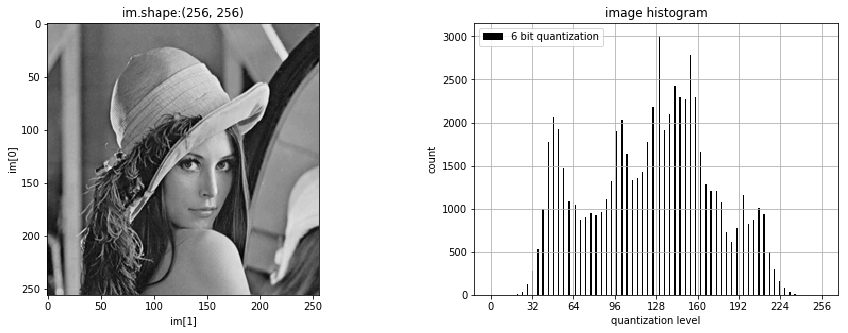

In [52]:
im6 = convert_quantization(image=im, to_bit=6)

_im = im6
#======================================
fig = plt.figure(figsize=(15,5))
nrows, ncols, idx = 1, 2, 0
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im, cmap="gray")
ax.set_title(label="im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
#======================================
# image histogram
bins_range = np.arange(0, 2**8+1, 1)
xtics_range = np.arange(0, 2**8+1, 32)
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.hist(x=_im.flatten(), bins=bins_range, color="black", label="6 bit quantization")
ax.set_title(label="image histogram")
ax.set_xlabel(xlabel="quantization level")
ax.set_ylabel(ylabel="count")
ax.legend(loc=2)
ax.grid(b=True)
ax.set_xticks(ticks=xtics_range)
#===================
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

#### 4ビット量子化 16階調

17.066666666666666


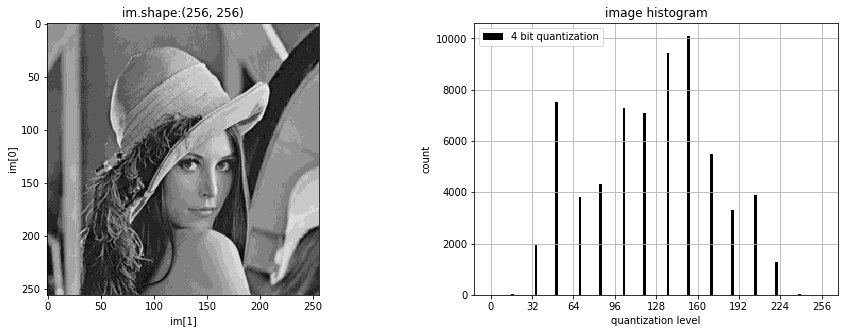

In [53]:
im4 = convert_quantization(image=im, to_bit=4)

_im = im4
#======================================
fig = plt.figure(figsize=(15,5))
nrows, ncols, idx = 1, 2, 0
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im, cmap="gray")
ax.set_title(label="im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
#======================================
# image histogram
bins_range = np.arange(0, 2**8+1, 2)
xtics_range = np.arange(0, 2**8+1, 32)
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.hist(x=_im.flatten(), bins=bins_range, color="black", label="4 bit quantization")
ax.set_title(label="image histogram")
ax.set_xlabel(xlabel="quantization level")
ax.set_ylabel(ylabel="count")
ax.legend(loc=2)
ax.grid(b=True)
ax.set_xticks(ticks=xtics_range)
#===================
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

#### 2ビット量子化 4階調

85.33333333333333


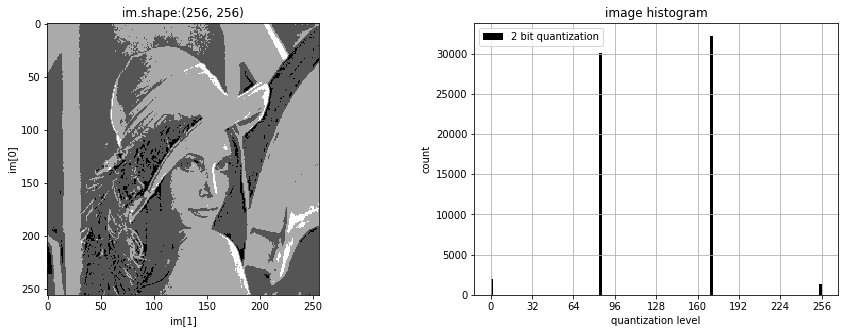

In [54]:
im2 = convert_quantization(image=im, to_bit=2)

_im = im2
#======================================
fig = plt.figure(figsize=(15,5))
nrows, ncols, idx = 1, 2, 0
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im, cmap="gray")
ax.set_title(label="im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
#======================================
# image histogram
bins_range = np.arange(0, 2**8+1, 2)
xtics_range = np.arange(0, 2**8+1, 32)
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.hist(x=_im.flatten(), bins=bins_range, color="black", label="2 bit quantization")
ax.set_title(label="image histogram")
ax.set_xlabel(xlabel="quantization level")
ax.set_ylabel(ylabel="count")
ax.legend(loc=2)
ax.grid(b=True)
ax.set_xticks(ticks=xtics_range)
#===================
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

#### 1ビット量子化 2階調

256.0


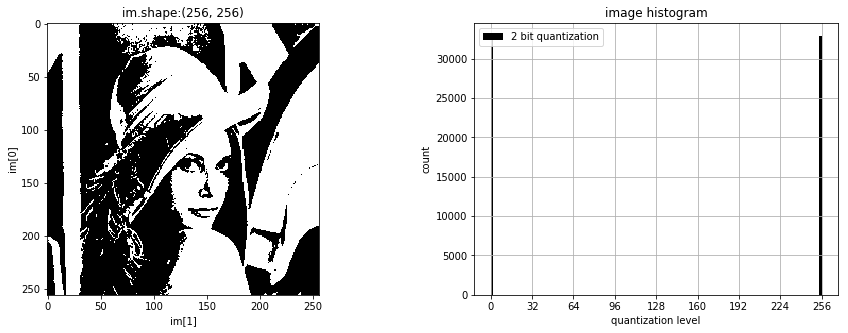

In [57]:
n_bit = 1
im1 = convert_quantization(image=im, to_bit=n_bit)

_im = im1
#======================================
fig = plt.figure(figsize=(15,5))
nrows, ncols, idx = 1, 2, 0
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im, cmap="gray")
ax.set_title(label="im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
#======================================
# image histogram
bins_range = np.arange(0, 2**8+1, 2)
xtics_range = np.arange(0, 2**8+1, 32)
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.hist(x=_im.flatten(), bins=bins_range, color="black", label="2 bit quantization")
ax.set_title(label="image histogram")
ax.set_xlabel(xlabel="quantization level")
ax.set_ylabel(ylabel="count")
ax.legend(loc=2)
ax.grid(b=True)
ax.set_xticks(ticks=xtics_range)
#===================
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

#### OpenCVの２値化処理

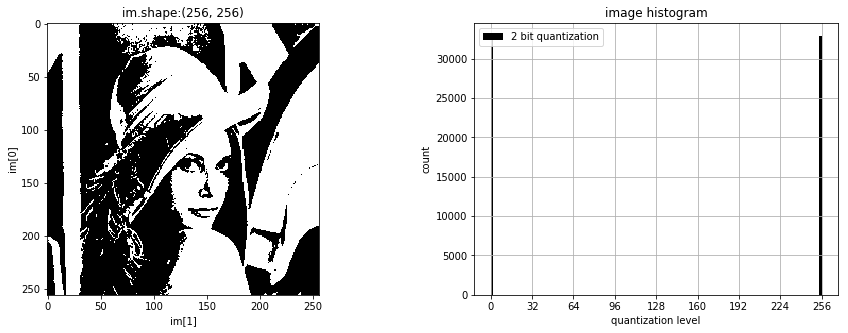

In [58]:
ret,thresh1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY)

#======================================
fig = plt.figure(figsize=(15,5))
nrows, ncols, idx = 1, 2, 0
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im, cmap="gray")
ax.set_title(label="im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
#======================================
# image histogram
bins_range = np.arange(0, 2**8+1, 2)
xtics_range = np.arange(0, 2**8+1, 32)
#===================
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.hist(x=_im.flatten(), bins=bins_range, color="black", label="2 bit quantization")
ax.set_title(label="image histogram")
ax.set_xlabel(xlabel="quantization level")
ax.set_ylabel(ylabel="count")
ax.legend(loc=2)
ax.grid(b=True)
ax.set_xticks(ticks=xtics_range)
#=======================================
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

#### Plot All

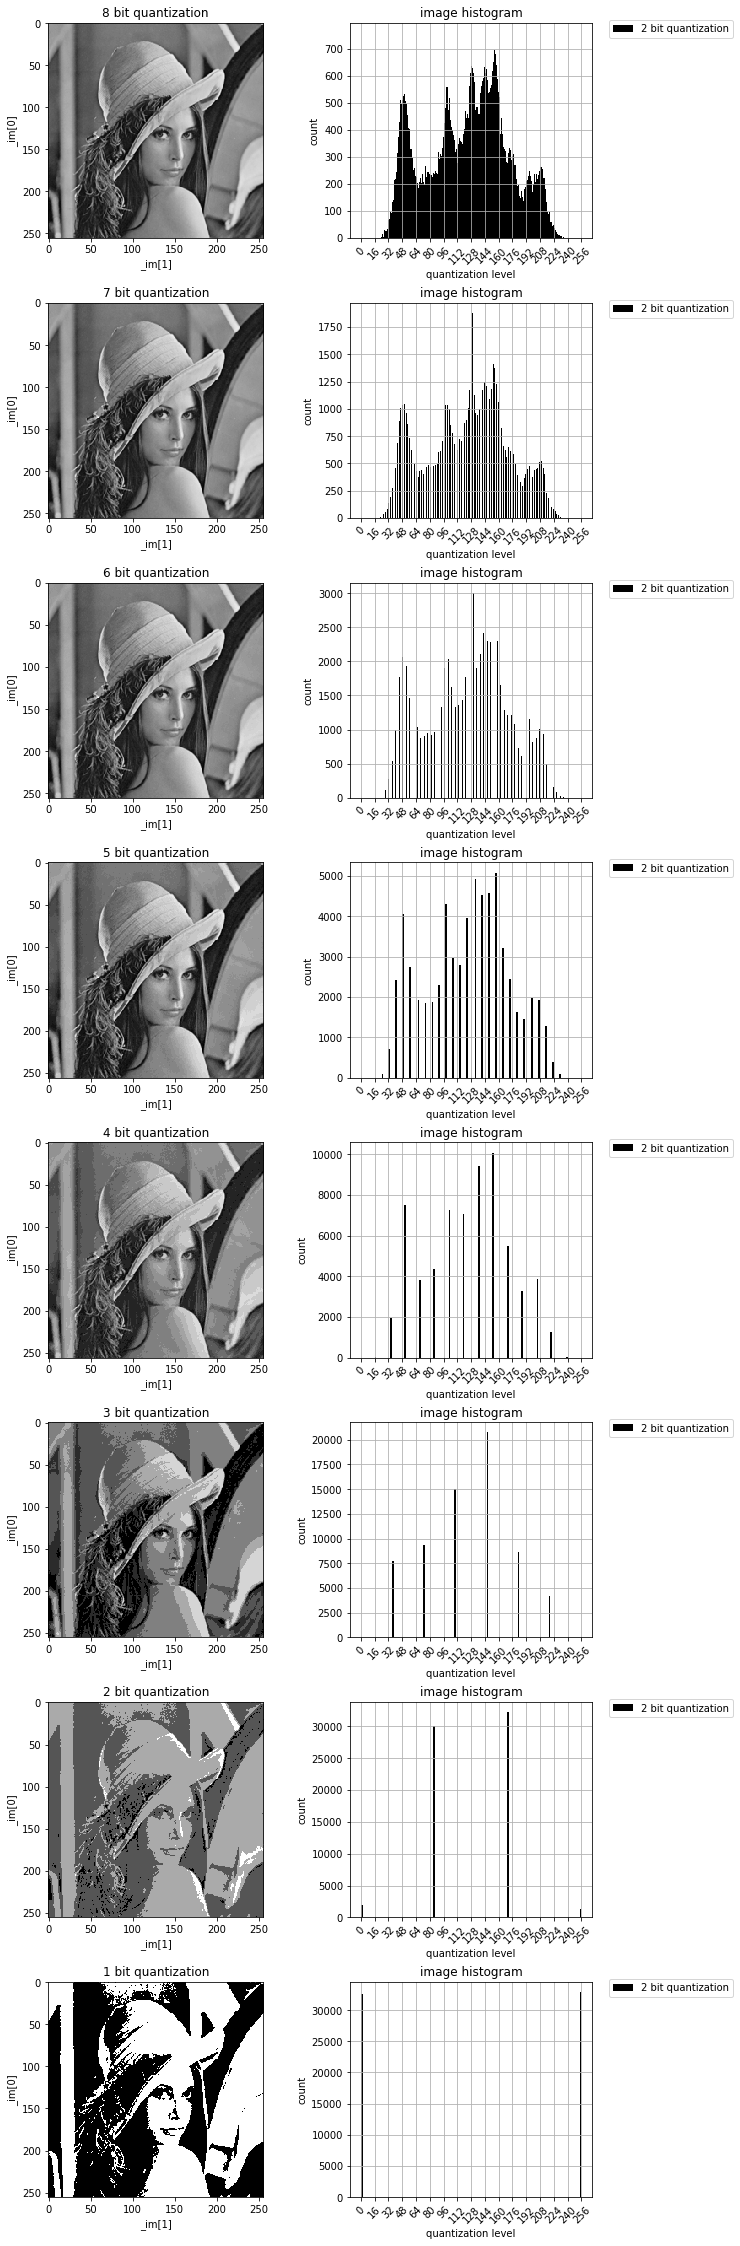

In [84]:
# grayscale image
_filepath = str(img_dir_Path / "mono" / "LENNA.bmp")
im = cv2.imread(filename=_filepath, flags=cv2.IMREAD_GRAYSCALE)
assert im is not None, "Could not open or find the image : {}".format(_filepath)
#===========================================================
# Plot
nrows, ncols, idx = 8, 2, 0
fig = plt.figure(figsize=(ncols*5, nrows*5))
#=======================================
for n_bit in range(nrows, 0, -1):
    idx += 1
    _im = convert_quantization(image=im, to_bit=n_bit)
    ax = fig.add_subplot(nrows, ncols, idx)
    #===================================
    ax.imshow(X=_im, cmap="gray")
    ax.set_title(label="{} bit quantization".format(n_bit))
    ax.set_xlabel(xlabel="_im[1]")
    ax.set_ylabel(ylabel="_im[0]")
    #===================================
    # image histogram
    bins_step = 2 if n_bit < 6 else 1
    bins_range = np.arange(0, 2**8+1, bins_step)
    xtics_range = np.arange(0, 2**8+1, 16)
    #===============
    idx += 1
    ax = fig.add_subplot(nrows, ncols, idx)
    ax.hist(x=_im.flatten(), bins=bins_range, color="black", label="2 bit quantization")
    ax.set_title(label="image histogram")
    ax.set_xlabel(xlabel="quantization level")
    ax.set_ylabel(ylabel="count")
    ax.legend(loc="lower left", bbox_to_anchor=(1.07, 1-0.07), borderaxespad=0.)
    ax.grid(b=True)
    ax.set_xticks(ticks=xtics_range)
    ax.set_xticklabels(labels=xtics_range, rotation=45)
#=======================================
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()